### Import Libraries

In [763]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [764]:
house_price = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [765]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Understanding

In [766]:
house_price.shape

(1460, 81)

In [767]:
house_price.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [768]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [769]:
for i in house_price.columns:
    if house_price[i].isna().sum() > 0:
        print("{} : {}".format(i,house_price[i].isna().sum()))

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


In [770]:
for i in test_data.columns:
    if test_data[i].isna().sum() > 0:
        print("{} : {}".format(i,test_data[i].isna().sum()))

MSZoning : 4
LotFrontage : 227
Alley : 1352
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 16
MasVnrArea : 15
BsmtQual : 44
BsmtCond : 45
BsmtExposure : 44
BsmtFinType1 : 42
BsmtFinSF1 : 1
BsmtFinType2 : 42
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
BsmtFullBath : 2
BsmtHalfBath : 2
KitchenQual : 1
Functional : 2
FireplaceQu : 730
GarageType : 76
GarageYrBlt : 78
GarageFinish : 78
GarageCars : 1
GarageArea : 1
GarageQual : 78
GarageCond : 78
PoolQC : 1456
Fence : 1169
MiscFeature : 1408
SaleType : 1


In [771]:
house_price.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [772]:
for i in house_price.columns:
    if house_price[i].isna().sum() > 0:
        print("{} : {}".format(i,house_price[i].unique()))

LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley : [nan 'Grvl' 'Pave']
MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea : [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.6

### Data Preparation

In [773]:
house_price.drop(columns=["Id"],inplace=True)
test_data.drop(columns=["Id"],inplace=True)

In [774]:
house_price["BsmtQual"].fillna(value="NA",inplace=True)
test_data["BsmtQual"].fillna(value="NA",inplace=True)

In [775]:
house_price["BsmtCond"].fillna(value="NA",inplace=True)
test_data["BsmtCond"].fillna(value="NA",inplace=True)

In [776]:
house_price["BsmtExposure"].fillna(value="NA",inplace=True)
test_data["BsmtExposure"].fillna(value="NA",inplace=True)

In [777]:
house_price["BsmtFinType1"].fillna(value="NA",inplace=True)
house_price["BsmtFinType2"].fillna(value="NA",inplace=True)
test_data["BsmtFinType1"].fillna(value="NA",inplace=True)
test_data["BsmtFinType2"].fillna(value="NA",inplace=True)

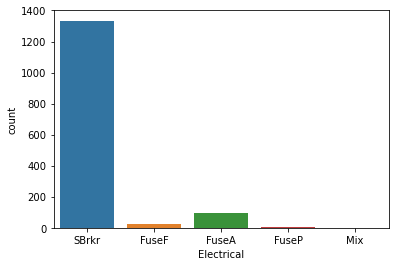

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [778]:
sns.countplot(house_price.Electrical)
plt.show()
house_price.Electrical.value_counts()

In [779]:
house_price["Electrical"].fillna(value="SBrkr",inplace=True)
test_data["Electrical"].fillna(value="SBrkr",inplace=True)

In [780]:
house_price["FireplaceQu"].fillna(value="NA",inplace=True)
test_data["FireplaceQu"].fillna(value="NA",inplace=True)

In [781]:
house_price["GarageType"].fillna(value="NA",inplace=True)
house_price["GarageFinish"].fillna(value="NA",inplace=True)
house_price["GarageQual"].fillna(value="NA",inplace=True)
house_price["GarageCond"].fillna(value="NA",inplace=True)
test_data["GarageType"].fillna(value="NA",inplace=True)
test_data["GarageFinish"].fillna(value="NA",inplace=True)
test_data["GarageQual"].fillna(value="NA",inplace=True)
test_data["GarageCond"].fillna(value="NA",inplace=True)

In [782]:
house_price["PoolQC"].fillna(value="NA",inplace=True)
test_data["PoolQC"].fillna(value="NA",inplace=True)

In [783]:
house_price["Fence"].fillna(value="NA",inplace=True)
test_data["Fence"].fillna(value="NA",inplace=True)

In [784]:
house_price["MasVnrType"].fillna(value="None",inplace=True)
house_price["MasVnrArea"].fillna(value=0,inplace=True)
test_data["MasVnrType"].fillna(value="None",inplace=True)
test_data["MasVnrArea"].fillna(value=0,inplace=True)

In [785]:
house_price["Alley"].fillna(value="NA",inplace=True)
test_data["Alley"].fillna(value="NA",inplace=True)

In [786]:
house_price["GarageYrBlt"].fillna(value=0,inplace=True)
test_data["GarageYrBlt"].fillna(value=0,inplace=True)

In [787]:
house_price["MiscFeature"].fillna(value="NA",inplace=True)
test_data["MiscFeature"].fillna(value="NA",inplace=True)

In [788]:
house_price.groupby(by=["MSZoning"],as_index=True)["LotFrontage"].mean()

MSZoning
C (all)    69.700000
FV         59.491228
RH         58.923077
RL         74.680043
RM         52.366834
Name: LotFrontage, dtype: float64

In [789]:
test_data.groupby(by=["MSZoning"],as_index=True)["LotFrontage"].mean()

MSZoning
C (all)    62.461538
FV         59.564516
RH         50.900000
RL         73.420938
RM         52.140969
Name: LotFrontage, dtype: float64

In [790]:
for i,j in enumerate(house_price["MSZoning"]):
    if j=="C (all)":
        house_price["LotFrontage"].fillna(value=70,inplace=True)
        test_data["LotFrontage"].fillna(value=70,inplace=True)
    elif j=="FV":
        house_price["LotFrontage"].fillna(value=59,inplace=True)
        test_data["LotFrontage"].fillna(value=59,inplace=True)
    elif j=="RH":
        house_price["LotFrontage"].fillna(value=59,inplace=True)
        test_data["LotFrontage"].fillna(value=59,inplace=True)
    elif j=="RL":
        house_price["LotFrontage"].fillna(value=75,inplace=True)
        test_data["LotFrontage"].fillna(value=75,inplace=True)
    else:
        house_price["LotFrontage"].fillna(value=52,inplace=True)
        test_data["LotFrontage"].fillna(value=52,inplace=True)

In [791]:
house_price.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [792]:
for i in test_data.columns:
    if test_data[i].isna().sum() > 0:
        print("{} : {}".format(i,test_data[i].isna().sum()))

MSZoning : 4
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
BsmtFinSF1 : 1
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
BsmtFullBath : 2
BsmtHalfBath : 2
KitchenQual : 1
Functional : 2
GarageCars : 1
GarageArea : 1
SaleType : 1


In [793]:
test_data["MSZoning"].fillna(value="RL",inplace=True)
test_data["Utilities"].fillna(value="AllPub",inplace=True)
test_data["Exterior1st"].fillna(value="VinylSd",inplace=True)
test_data["Exterior2nd"].fillna(value="VinylSd",inplace=True)
test_data["BsmtFinSF1"].fillna(value=0,inplace=True)
test_data["BsmtFinSF2"].fillna(value=0,inplace=True)
test_data["BsmtUnfSF"].fillna(value=0,inplace=True)
test_data["TotalBsmtSF"].fillna(value=0,inplace=True)
test_data["BsmtFullBath"].fillna(value=0,inplace=True)
test_data["BsmtHalfBath"].fillna(value=0,inplace=True)
test_data["KitchenQual"].fillna(value="TA",inplace=True)
test_data["Functional"].fillna(value="Typ",inplace=True)
test_data["GarageCars"].fillna(value=2,inplace=True)
test_data["GarageArea"].fillna(value=0,inplace=True)
test_data["SaleType"].fillna(value="WD",inplace=True)

In [794]:
for i in test_data.columns:
    if test_data[i].isna().sum() > 0:
        print("{} : {}".format(i,test_data[i].isna().sum()))

In [795]:
for i in house_price.LotFrontage:
    if i == 0:
        house_price.LotFrontage = 0
    elif i >0 and i <=20:
        house_price.LotFrontage = 1
    elif i >20 and i <=40:
        house_price.LotFrontage = 2
    elif i >40 and i <=60:
        house_price.LotFrontage = 3
    elif i >60 and i <=80:
        house_price.LotFrontage = 4
    elif i >80 and i <=100:
        house_price.LotFrontage = 5
    else:
        house_price.LotFrontage = 6

In [799]:
for i in house_price.LotArea:
    if i == 0:
        house_price.LotArea = 0
    elif i >0 and i <=200:
        house_price.LotArea = 1
    elif i >200 and i <=400:
        house_price.LotArea = 2
    elif i >400 and i <=600:
        house_price.LotArea = 3
    elif i >600 and i <=800:
        house_price.LotArea = 4
    elif i >800 and i <=1000:
        house_price.LotArea = 5
    else:
        house_price.LotArea = 6

In [800]:
for i in house_price.MasVnrArea:
    if i == 0:
        house_price.MasVnrArea = 0
    if i >0 and i <=50:
        house_price.MasVnrArea = 1
    elif i >50 and i <=100:
        house_price.MasVnrArea = 2
    elif i >100 and i <=150:
        house_price.MasVnrArea = 3
    elif i >150 and i <=200:
        house_price.MasVnrArea = 4
    elif i >200 and i <=250:
        house_price.MasVnrArea = 5
    elif i >250 and i <=300:
        house_price.MasVnrArea = 6
    else:
        house_price.MasVnrArea = 7

In [801]:
for i in house_price.BsmtFinSF1:
    if i == 0:
        house_price.BsmtFinSF1 = 0
    elif i >0 and i <=100:
        house_price.BsmtFinSF1 = 1
    elif i >100 and i <=200:
        house_price.BsmtFinSF1 = 2
    elif i >200 and i <=300:
        house_price.BsmtFinSF1 = 3
    elif i >300 and i <=400:
        house_price.BsmtFinSF1 = 4
    elif i >400 and i <=500:
        house_price.BsmtFinSF1 = 5
    elif i >500 and i <=600:
        house_price.BsmtFinSF1 = 6
    else:
        house_price.BsmtFinSF1 = 7

In [802]:
for i in house_price.BsmtUnfSF:
    if i == 0:
        house_price.BsmtUnfSF = 0
    elif i >0 and i <=100:
        house_price.BsmtUnfSF = 1
    elif i >100 and i <=200:
        house_price.BsmtUnfSF = 2
    elif i >200 and i <=300:
        house_price.BsmtUnfSF = 3
    elif i >300 and i <=400:
        house_price.BsmtUnfSF = 4
    elif i >400 and i <=500:
        house_price.BsmtUnfSF = 5
    elif i >500 and i <=600:
        house_price.BsmtUnfSF = 6
    elif i >600 and i <=700:
        house_price.BsmtUnfSF = 7
    else:
        house_price.BsmtUnfSF = 8

In [803]:
for i in house_price.TotalBsmtSF:
    if i == 0:
        house_price.TotalBsmtSF = 0
    elif i >0 and i <=100:
        house_price.TotalBsmtSF = 1
    elif i >100 and i <=200:
        house_price.TotalBsmtSF = 2
    elif i >200 and i <=300:
        house_price.TotalBsmtSF = 3
    elif i >300 and i <=400:
        house_price.TotalBsmtSF = 4
    elif i >400 and i <=500:
        house_price.TotalBsmtSF = 5
    elif i >500 and i <=600:
        house_price.TotalBsmtSF = 6
    elif i >600 and i <=700:
        house_price.TotalBsmtSF = 7
    else:
        house_price.TotalBsmtSF = 8

In [804]:
for i in house_price["1stFlrSF"]:
    if i == 0:
        house_price["1stFlrSF"] = 0
    elif i >0 and i <=100:
        house_price["1stFlrSF"] = 1
    elif i >100 and i <=200:
        house_price["1stFlrSF"] = 2
    elif i >200 and i <=300:
        house_price["1stFlrSF"] = 3
    elif i >300 and i <=400:
        house_price["1stFlrSF"] = 4
    elif i >400 and i <=500:
        house_price["1stFlrSF"] = 5
    elif i >500 and i <=600:
        house_price["1stFlrSF"] = 6
    elif i >600 and i <=700:
        house_price["1stFlrSF"] = 7
    else:
        house_price["1stFlrSF"] = 8

In [805]:
for i in house_price["2ndFlrSF"]:
    if i == 0:
        house_price["2ndFlrSF"] = 0
    elif i >0 and i <=100:
        house_price["2ndFlrSF"] = 1
    elif i >100 and i <=200:
        Xhouse_price["2ndFlrSF"] = 2
    elif i >200 and i <=300:
        house_price["2ndFlrSF"] = 3
    else:
        house_price["1stFlrSF"] = 4

In [806]:
for i in house_price["GrLivArea"]:
    if i == 0:
        house_price["GrLivArea"] = 0
    elif i >0 and i <=200:
        house_price["GrLivArea"] = 1
    elif i >200 and i <=400:
        house_price["GrLivArea"] = 2
    elif i >400 and i <=600:
        house_price["GrLivArea"] = 3
    elif i >600 and i <=800:
        house_price["GrLivArea"] = 4
    else:
        house_price["1stFlrSF"] = 5

In [807]:
for i in house_price["GarageArea"]:
    if i == 0:
        house_price["GarageArea"] = 0
    elif i >0 and i <=100:
        house_price["GarageArea"] = 1
    elif i >100 and i <=200:
        house_price["GarageArea"] = 2
    elif i >200 and i <=300:
        house_price["GarageArea"] = 3
    elif i >300 and i <=400:
        house_price["GarageArea"] = 4
    else:
        house_price["GarageArea"] = 5

In [808]:
for i in house_price["WoodDeckSF"]:
    if i == 0:
        house_price["WoodDeckSF"] = 0
    elif i >0 and i <=50:
        house_price["WoodDeckSF"] = 1
    elif i >50 and i <=100:
        house_price["WoodDeckSF"] = 2
    elif i >100 and i <=150:
        house_price["WoodDeckSF"] = 3
    elif i >150 and i <=200:
        house_price["WoodDeckSF"] = 4
    elif i >200 and i <=250:
        house_price["WoodDeckSF"] = 5
    else:
        house_price["WoodDeckSF"] = 6

In [809]:
for i in house_price["OpenPorchSF"]:
    if i == 0:
        house_price["OpenPorchSF"] = 0
    elif i >0 and i <=50:
        house_price["OpenPorchSF"] = 1
    elif i >50 and i <=100:
        house_price["OpenPorchSF"] = 2
    elif i >100 and i <=150:
        house_price["OpenPorchSF"] = 3
    elif i >150 and i <=200:
        house_price["OpenPorchSF"] = 4
    elif i >200 and i <=250:
        house_price["OpenPorchSF"] = 5
    else:
        house_price["OpenPorchSF"] = 6

In [810]:
for i in house_price["EnclosedPorch"]:
    if i == 0:
        house_price["EnclosedPorch"] = 0
    elif i >0 and i <=20:
        house_price["EnclosedPorch"] = 1
    elif i >20 and i <=40:
        house_price["EnclosedPorch"] = 2
    elif i >40 and i <=60:
        house_price["EnclosedPorch"] = 3
    elif i >60 and i <=80:
        house_price["EnclosedPorch"] = 4
    elif i >80 and i <=100:
        house_price["EnclosedPorch"] = 5
    else:
        house_price["EnclosedPorch"] = 6

In [811]:
for i in house_price["3SsnPorch"]:
    if i == 0:
        house_price["3SsnPorch"] = 0
    elif i >0 and i <=100:
        house_price["3SsnPorch"] = 1
    elif i >100 and i <=200:
        house_price["3SsnPorch"] = 2
    elif i >200 and i <=300:
        house_price["3SsnPorch"] = 3
    elif i >300 and i <=400:
        house_price["3SsnPorch"] = 4
    else:
        house_price["3SsnPorch"] = 5

In [812]:
for i in house_price["ScreenPorch"]:
    if i == 0:
        house_price["ScreenPorch"] = 0
    elif i >0 and i <=100:
        house_price["ScreenPorch"] = 1
    elif i >100 and i <=200:
        house_price["ScreenPorch"] = 2
    elif i >200 and i <=300:
        house_price["ScreenPorch"] = 3
    elif i >300 and i <=400:
        house_price["ScreenPorch"] = 4
    else:
        house_price["ScreenPorch"] = 5

In [813]:
house_price["YearOld"] = 2022-house_price["YearBuilt"]

In [814]:
for i in house_price.YearOld:
    if i >0 and i <=20:
        house_price.YearOld = 0
    elif i >20 and i <=40:
        house_price.YearOld = 1
    elif i >40 and i <=60:
        house_price.YearOld = 2
    elif i >60 and i <=80:
        house_price.YearOld = 3
    elif i >80 and i <=100:
        house_price.YearOld = 4
    else:
        house_price.YearOld = 5

In [815]:
house_price.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearOld
0,60,RL,4,1,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,1,Gd,TA,PConc,Gd,TA,No,GLQ,1,Unf,0,1,1,GasA,Ex,Y,SBrkr,5,0,0,1,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500,5
1,20,RL,4,1,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,1,TA,TA,CBlock,Gd,TA,Gd,ALQ,1,Unf,0,1,1,GasA,Ex,Y,SBrkr,5,0,0,1,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500,5
2,60,RL,4,1,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,1,Gd,TA,PConc,Gd,TA,Mn,GLQ,1,Unf,0,1,1,GasA,Ex,Y,SBrkr,5,0,0,1,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500,5
3,70,RL,4,1,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,1,TA,TA,BrkTil,TA,Gd,No,ALQ,1,Unf,0,1,1,GasA,Gd,Y,SBrkr,5,0,0,1,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000,5
4,60,RL,4,1,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1,Gd,TA,PConc,Gd,TA,Av,GLQ,1,Unf,0,1,1,GasA,Ex,Y,SBrkr,5,0,0,1,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000,5


In [816]:
test_data["YearOld"] = 2022-test_data["YearBuilt"]

In [817]:
for i in test_data.LotFrontage:
    if i == 0:
        test_data.LotFrontage = 0
    elif i >0 and i <=20:
        test_data.LotFrontage = 1
    elif i >20 and i <=40:
        test_data.LotFrontage = 2
    elif i >40 and i <=60:
        test_data.LotFrontage = 3
    elif i >60 and i <=80:
        test_data.LotFrontage = 4
    elif i >80 and i <=100:
        test_data.LotFrontage = 5
    else:
        test_data.LotFrontage = 6

In [818]:
for i in test_data.LotArea:
    if i == 0:
        test_data.LotArea = 0
    elif i >0 and i <=200:
        test_data.LotArea = 1
    elif i >200 and i <=400:
        test_data.LotArea = 2
    elif i >400 and i <=600:
        test_data.LotArea = 3
    elif i >600 and i <=800:
        test_data.LotArea = 4
    elif i >800 and i <=1000:
        test_data.LotArea = 5
    else:
        test_data.LotArea = 6

In [819]:
for i in test_data.MasVnrArea:
    if i == 0:
        test_data.MasVnrArea = 0
    if i >0 and i <=50:
        test_data.MasVnrArea = 1
    elif i >50 and i <=100:
        test_data.MasVnrArea = 2
    elif i >100 and i <=150:
        test_data.MasVnrArea = 3
    elif i >150 and i <=200:
        test_data.MasVnrArea = 4
    elif i >200 and i <=250:
        test_data.MasVnrArea = 5
    elif i >250 and i <=300:
        test_data.MasVnrArea = 6
    else:
        test_data.MasVnrArea = 7

In [820]:
for i in test_data.BsmtFinSF1:
    if i == 0:
        test_data.BsmtFinSF1 = 0
    elif i >0 and i <=100:
        test_data.BsmtFinSF1 = 1
    elif i >100 and i <=200:
        test_data.BsmtFinSF1 = 2
    elif i >200 and i <=300:
        test_data.BsmtFinSF1 = 3
    elif i >300 and i <=400:
        test_data.BsmtFinSF1 = 4
    elif i >400 and i <=500:
        test_data.BsmtFinSF1 = 5
    elif i >500 and i <=600:
        test_data.BsmtFinSF1 = 6
    else:
        test_data.BsmtFinSF1 = 7

In [821]:
for i in test_data.BsmtUnfSF:
    if i == 0:
        test_data.BsmtUnfSF = 0
    elif i >0 and i <=100:
        test_data.BsmtUnfSF = 1
    elif i >100 and i <=200:
        test_data.BsmtUnfSF = 2
    elif i >200 and i <=300:
        test_data.BsmtUnfSF = 3
    elif i >300 and i <=400:
        test_data.BsmtUnfSF = 4
    elif i >400 and i <=500:
        test_data.BsmtUnfSF = 5
    elif i >500 and i <=600:
        test_data.BsmtUnfSF = 6
    elif i >600 and i <=700:
        test_data.BsmtUnfSF = 7
    else:
        test_data.BsmtUnfSF = 8

In [822]:
for i in test_data.TotalBsmtSF:
    if i == 0:
        test_data.TotalBsmtSF = 0
    elif i >0 and i <=100:
        test_data.TotalBsmtSF = 1
    elif i >100 and i <=200:
        test_data.TotalBsmtSF = 2
    elif i >200 and i <=300:
        test_data.TotalBsmtSF = 3
    elif i >300 and i <=400:
        test_data.TotalBsmtSF = 4
    elif i >400 and i <=500:
        test_data.TotalBsmtSF = 5
    elif i >500 and i <=600:
        test_data.TotalBsmtSF = 6
    elif i >600 and i <=700:
        test_data.TotalBsmtSF = 7
    else:
        test_data.TotalBsmtSF = 8

In [823]:
for i in test_data["1stFlrSF"]:
    if i == 0:
        test_data["1stFlrSF"] = 0
    elif i >0 and i <=100:
        test_data["1stFlrSF"] = 1
    elif i >100 and i <=200:
        test_data["1stFlrSF"] = 2
    elif i >200 and i <=300:
        test_data["1stFlrSF"] = 3
    elif i >300 and i <=400:
        test_data["1stFlrSF"] = 4
    elif i >400 and i <=500:
        test_data["1stFlrSF"] = 5
    elif i >500 and i <=600:
        test_data["1stFlrSF"] = 6
    elif i >600 and i <=700:
        test_data["1stFlrSF"] = 7
    else:
        test_data["1stFlrSF"] = 8

In [824]:
for i in test_data["2ndFlrSF"]:
    if i == 0:
        test_data["2ndFlrSF"] = 0
    elif i >0 and i <=100:
        test_data["2ndFlrSF"] = 1
    elif i >100 and i <=200:
        test_data["2ndFlrSF"] = 2
    elif i >200 and i <=300:
        test_data["2ndFlrSF"] = 3
    else:
        test_data["1stFlrSF"] = 4

In [825]:
for i in test_data["GrLivArea"]:
    if i == 0:
        test_data["GrLivArea"] = 0
    elif i >0 and i <=200:
        test_data["GrLivArea"] = 1
    elif i >200 and i <=400:
        test_data["GrLivArea"] = 2
    elif i >400 and i <=600:
        test_data["GrLivArea"] = 3
    elif i >600 and i <=800:
        test_data["GrLivArea"] = 4
    else:
        test_data["1stFlrSF"] = 5

In [826]:
for i in test_data["GarageArea"]:
    if i == 0:
        test_data["GarageArea"] = 0
    elif i >0 and i <=100:
        test_data["GarageArea"] = 1
    elif i >100 and i <=200:
        test_data["GarageArea"] = 2
    elif i >200 and i <=300:
        test_data["GarageArea"] = 3
    elif i >300 and i <=400:
        test_data["GarageArea"] = 4
    else:
        test_data["GarageArea"] = 5

In [827]:
for i in test_data["WoodDeckSF"]:
    if i == 0:
        test_data["WoodDeckSF"] = 0
    elif i >0 and i <=50:
        test_data["WoodDeckSF"] = 1
    elif i >50 and i <=100:
        test_data["WoodDeckSF"] = 2
    elif i >100 and i <=150:
        test_data["WoodDeckSF"] = 3
    elif i >150 and i <=200:
        test_data["WoodDeckSF"] = 4
    elif i >200 and i <=250:
        test_data["WoodDeckSF"] = 5
    else:
        test_data["WoodDeckSF"] = 6

In [828]:
for i in test_data["OpenPorchSF"]:
    if i == 0:
        test_data["OpenPorchSF"] = 0
    elif i >0 and i <=50:
        test_data["OpenPorchSF"] = 1
    elif i >50 and i <=100:
        test_data["OpenPorchSF"] = 2
    elif i >100 and i <=150:
        test_data["OpenPorchSF"] = 3
    elif i >150 and i <=200:
        test_data["OpenPorchSF"] = 4
    elif i >200 and i <=250:
        test_data["OpenPorchSF"] = 5
    else:
        test_data["OpenPorchSF"] = 6

In [829]:
for i in test_data["EnclosedPorch"]:
    if i == 0:
        test_data["EnclosedPorch"] = 0
    elif i >0 and i <=20:
        test_data["EnclosedPorch"] = 1
    elif i >20 and i <=40:
        test_data["EnclosedPorch"] = 2
    elif i >40 and i <=60:
        test_data["EnclosedPorch"] = 3
    elif i >60 and i <=80:
        test_data["EnclosedPorch"] = 4
    elif i >80 and i <=100:
        test_data["EnclosedPorch"] = 5
    else:
        test_data["EnclosedPorch"] = 6

In [830]:
for i in test_data["3SsnPorch"]:
    if i == 0:
        test_data["3SsnPorch"] = 0
    elif i >0 and i <=100:
        test_data["3SsnPorch"] = 1
    elif i >100 and i <=200:
        test_data["3SsnPorch"] = 2
    elif i >200 and i <=300:
        test_data["3SsnPorch"] = 3
    elif i >300 and i <=400:
        test_data["3SsnPorch"] = 4
    else:
        test_data["3SsnPorch"] = 5

In [831]:
for i in test_data["ScreenPorch"]:
    if i == 0:
        test_data["ScreenPorch"] = 0
    elif i >0 and i <=100:
        test_data["ScreenPorch"] = 1
    elif i >100 and i <=200:
        test_data["ScreenPorch"] = 2
    elif i >200 and i <=300:
        test_data["ScreenPorch"] = 3
    elif i >300 and i <=400:
        test_data["ScreenPorch"] = 4
    else:
        test_data["ScreenPorch"] = 5

In [832]:
for i in test_data.YearOld:
    if i >0 and i <=20:
        test_data.YearOld = 0
    elif i >20 and i <=40:
        test_data.YearOld = 1
    elif i >40 and i <=60:
        test_data.YearOld = 2
    elif i >60 and i <=80:
        test_data.YearOld = 3
    elif i >80 and i <=100:
        test_data.YearOld = 4
    else:
        test_data.YearOld = 5

In [833]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearOld
0,20,RH,4,1,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,2,TA,TA,CBlock,TA,TA,No,Rec,7,LwQ,144.0,3,8,GasA,TA,Y,SBrkr,5,0,0,1,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961.0,Unf,1.0,5,TA,TA,Y,1,0,0,0,1,0,NA,MnPrv,NA,0,6,2010,WD,Normal,5
1,20,RL,4,1,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,2,TA,TA,CBlock,TA,TA,No,ALQ,7,Unf,0.0,3,8,GasA,TA,Y,SBrkr,5,0,0,1,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958.0,Unf,1.0,5,TA,TA,Y,1,0,0,0,1,0,NA,NA,Gar2,12500,6,2010,WD,Normal,5
2,60,RL,4,1,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,2,TA,TA,PConc,Gd,TA,No,GLQ,7,Unf,0.0,3,8,GasA,Gd,Y,SBrkr,5,0,0,1,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,5,TA,TA,Y,1,0,0,0,1,0,NA,MnPrv,NA,0,3,2010,WD,Normal,5
3,60,RL,4,1,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,TA,TA,PConc,TA,TA,No,GLQ,7,Unf,0.0,3,8,GasA,Ex,Y,SBrkr,5,0,0,1,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,5,TA,TA,Y,1,0,0,0,1,0,NA,NA,NA,0,6,2010,WD,Normal,5
4,120,RL,4,1,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,2,Gd,TA,PConc,Gd,TA,No,ALQ,7,Unf,0.0,3,8,GasA,Ex,Y,SBrkr,5,0,0,1,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992.0,RFn,2.0,5,TA,TA,Y,1,0,0,0,1,0,NA,NA,NA,0,1,2010,WD,Normal,5


### Model Building

In [834]:
X = house_price

In [835]:
X = X.drop(columns=["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold","SalePrice"],axis=1)

In [836]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearOld
0,60,RL,4,1,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,1,Gd,TA,PConc,Gd,TA,No,GLQ,1,Unf,0,1,1,GasA,Ex,Y,SBrkr,5,0,0,1,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,2,WD,Normal,5
1,20,RL,4,1,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,1,TA,TA,CBlock,Gd,TA,Gd,ALQ,1,Unf,0,1,1,GasA,Ex,Y,SBrkr,5,0,0,1,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,5,WD,Normal,5
2,60,RL,4,1,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,1,Gd,TA,PConc,Gd,TA,Mn,GLQ,1,Unf,0,1,1,GasA,Ex,Y,SBrkr,5,0,0,1,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,9,WD,Normal,5
3,70,RL,4,1,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,1,TA,TA,BrkTil,TA,Gd,No,ALQ,1,Unf,0,1,1,GasA,Gd,Y,SBrkr,5,0,0,1,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,2,WD,Abnorml,5
4,60,RL,4,1,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,1,Gd,TA,PConc,Gd,TA,Av,GLQ,1,Unf,0,1,1,GasA,Ex,Y,SBrkr,5,0,0,1,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,1,TA,TA,Y,0,1,0,0,0,0,NA,NA,NA,0,12,WD,Normal,5


In [837]:
Y = house_price[["SalePrice"]]

In [838]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [839]:
Y["SalePrice"] = Y["SalePrice"].apply(lambda x: 400000 if x >400000 else x)

In [840]:
Label_encoder = LabelEncoder()

In [841]:
X[X.columns] = X[X.columns].apply(LabelEncoder().fit_transform)

In [842]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearOld
0,5,3,0,0,1,1,3,3,0,4,0,5,2,2,0,5,6,4,1,1,12,13,1,0,2,4,2,2,4,4,2,0,6,0,0,0,1,0,1,4,0,0,0,0,1,0,2,1,3,1,2,6,6,0,3,1,2,2,0,5,5,2,0,0,0,0,0,0,3,4,1,0,1,8,4,0
1,0,3,0,0,1,1,3,3,0,2,0,24,1,2,0,2,5,7,1,1,8,8,2,0,3,4,1,2,4,1,0,0,6,0,0,0,1,0,1,4,0,0,0,0,0,1,2,0,3,1,3,4,6,1,5,1,2,2,0,5,5,2,0,0,0,0,0,0,3,4,1,0,4,8,4,0
2,5,3,0,0,1,1,0,3,0,4,0,5,2,2,0,5,6,4,1,1,12,13,1,0,2,4,2,2,4,2,2,0,6,0,0,0,1,0,1,4,0,0,0,0,1,0,2,1,3,1,2,4,6,1,5,1,2,2,0,5,5,2,0,0,0,0,0,0,3,4,1,0,8,8,4,0
3,6,3,0,0,1,1,0,3,0,0,0,6,2,2,0,5,6,4,1,1,13,15,2,0,3,4,0,4,1,4,0,0,6,0,0,0,1,2,1,4,0,0,0,0,1,0,1,0,3,1,2,5,6,1,2,5,3,3,0,5,5,2,0,0,0,0,0,0,3,4,1,0,1,8,0,0
4,5,3,0,0,1,1,0,3,0,2,0,15,2,2,0,5,7,4,1,1,12,13,1,0,2,4,2,2,4,0,2,0,6,0,0,0,1,0,1,4,0,0,0,0,1,0,2,1,4,1,2,7,6,1,5,1,2,3,0,5,5,2,0,0,0,0,0,0,3,4,1,0,11,8,4,0


In [843]:
scaler = StandardScaler()

In [844]:
X = scaler.fit_transform(X)

In [845]:
X_scaler = pd.DataFrame(data=X,columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'SaleType', 'SaleCondition', 'YearOld'])

In [846]:
X_scaler

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearOld
0,0.200350,-0.045532,0.0,0.0,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.0,-0.777976,0.364207,0.835599,-0.566939,0.325405,0.678263,-0.510942,0.0,0.344051,-0.305161,0.0,0.0,-0.123046,-0.884658,0.263813,0.302403,0.0,0.0,-0.114601,0.0,1.107810,-0.241061,0.789741,1.227585,0.165410,-0.211454,-0.409369,0.914289,0.255978,-0.951226,-0.075117,-0.768736,0.103495,0.311725,0.0,0.315602,0.295349,0.289745,0.0,0.0,0.0,0.0,0.0,-0.062051,0.063305,0.457447,-0.185975,-0.162018,-1.599111,0.313867,0.208502,0.0
1,-1.001421,-0.045532,0.0,0.0,0.064238,0.024699,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,0.0,0.663451,0.364207,-0.549162,-0.566939,0.325405,-1.235906,-1.399536,0.0,0.344051,-0.305161,0.0,0.0,-0.123046,-0.884658,0.263813,0.302403,0.0,0.0,-0.114601,0.0,-0.819964,3.948809,0.789741,-0.761621,0.165410,-0.211454,0.795629,-0.318840,0.255978,0.600495,1.638498,-0.768736,0.103495,0.311725,0.0,0.315602,0.295349,0.289745,0.0,0.0,0.0,0.0,0.0,-0.062051,0.063305,0.457447,-0.185975,-0.162018,-0.489110,0.313867,0.208502,0.0
2,0.200350,-0.045532,0.0,0.0,0.064238,0.024699,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.0,-0.777976,0.364207,0.835599,-0.566939,0.325405,-0.597850,-0.510942,0.0,0.344051,-0.305161,0.0,0.0,-0.123046,-0.884658,0.263813,0.302403,0.0,0.0,-0.114601,0.0,1.107810,-0.241061,0.789741,1.227585,0.165410,-0.211454,-0.409369,-0.318840,0.255978,0.600495,1.638498,-0.768736,0.103495,0.311725,0.0,0.315602,0.295349,0.289745,0.0,0.0,0.0,0.0,0.0,-0.062051,0.063305,0.457447,-0.185975,-0.162018,0.990891,0.313867,0.208502,0.0
3,0.440704,-0.045532,0.0,0.0,0.064238,0.024699,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-0.491516,-0.125797,1.055928,1.316701,0.387047,0.0,0.663451,0.364207,-1.933923,0.997770,-2.834848,0.678263,-1.399536,0.0,0.344051,-0.305161,0.0,0.0,-0.123046,0.265476,0.263813,0.302403,0.0,0.0,-0.114601,0.0,1.107810,-0.241061,-1.026041,-0.761621,0.165410,-0.211454,-0.409369,0.297725,0.255978,0.600495,-0.931925,1.301075,0.942959,1.650307,0.0,0.315602,0.295349,0.289745,0.0,0.0,0.0,0.0,0.0,-0.062051,0.063305,0.457447,-0.185975,-0.162018,-1.599111,0.313867,-3.426284,0.0
4,0.200350,-0.045532,0.0,0.0,0.064238,0.024699,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,-0.411691,1.026689,1.374795,-0.517200,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.0,-0.777976,0.364207,0.835599,-0.566939,0.325405,-1.873963,-0.510942,0.0,0.344051,-0.305161,0.0,0.0,-0.123046,-0.884658,0.263813,0.302403,0.0,0.0,-0.114601,0.0,1.107810,-0.241061,0.789741,1.227585,1.397548,-0.211454,-0.409369,1.530854,0.255978,0.600495,1.638498,-0.768736,0.103495,1.650307,0.0,0.315602,0.295349,0.289745,0.0,0.0,0.0,0.0,0.0,-0.062051,0.063305,0.457447,-0.185975,-0.162018,2.100892,0.313867,0.208502,0.0
...,...,...,...,...,...,...,

In [847]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=112)

In [848]:
print(X_train.shape,X_test.shape)

(1022, 76) (438, 76)


### Model Training

In [849]:
rf_model = GradientBoostingRegressor(max_depth=3,criterion='mse',n_estimators=100,min_samples_leaf=3,
                                     loss="ls",learning_rate=0.2,min_samples_split=2)
rf_model.fit(X_train,y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.2,
                          min_samples_leaf=3)

### Model Testing

In [850]:
y_pred_linear_train = rf_model.predict(X_train)
y_pred_linear_test = rf_model.predict(X_test)

In [851]:
print(rf_model.score(X_train,y_train))

0.951233325176903


In [852]:
print(rf_model.score(X_test,y_test))

0.8819780097198706


### Model Evaluation

In [853]:
y_pred_price = rf_model.predict(X)
y_pred_price

array([218920.44633332, 195641.92740163, 218132.59396131, ...,
       268662.17943666, 150817.46609204, 137397.48325536])

In [854]:
mean_absolute_error(Y,y_pred_price)

13410.187954377117

In [855]:
y_pred_price = pd.DataFrame(data=y_pred_price,columns=["SalePrice"])
y_pred_price

,SalePrice
0,218920.446333
1,195641.927402
2,218132.593961
3,162694.259108
4,305522.600015
...,...
1455,169035.940076
1456,194998.535656
1457,268662.179437
1458,150817.466092


In [856]:
error= Y-y_pred_price
error

,SalePrice
0,-10420.446333
1,-14141.927402
2,5367.406039
3,-22694.259108
4,-55522.600015
...,...
1455,5964.059924
1456,15001.464344
1457,-2162.179437
1458,-8692.466092


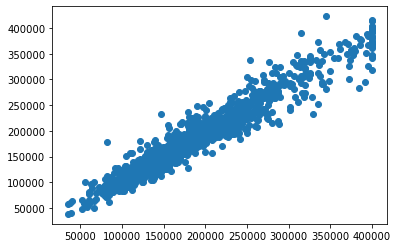

In [857]:
plt.scatter(x=Y['SalePrice'],y=y_pred_price)

In [858]:
test_dt = test_data

In [859]:
for i in test_dt.YearOld:
    if i >0 and i <=20:
        test_dt.YearOld = 0
    elif i >20 and i <=40:
        test_dt.YearOld = 1
    elif i >40 and i <=60:
        test_dt.YearOld = 2
    elif i >60 and i <=80:
        test_dt.YearOld = 3
    elif i >80 and i <=100:
        test_dt.YearOld = 4
    else:
        test_dt.YearOld = 5

In [860]:
test_dt = test_dt.drop(columns=["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"],axis=1)

In [861]:
test_dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPor

In [862]:
test_dt[test_dt.columns] = test_dt[test_dt.columns].apply(LabelEncoder().fit_transform)

In [863]:
test_dt.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearOld
0,0,2,0,0,1,1,3,3,0,4,0,12,1,2,0,2,4,5,1,0,10,12,2,0,3,4,1,4,4,4,5,0,3,31,0,0,0,4,1,3,0,0,0,0,0,0,1,0,2,1,3,2,6,0,3,1,3,1,0,4,5,2,0,0,0,0,0,0,2,2,1,0,5,8,4,0
1,0,3,0,0,1,1,0,3,0,0,0,12,2,2,0,2,5,5,3,0,11,13,1,0,3,4,1,4,4,4,0,0,6,0,0,0,0,4,1,3,0,0,0,0,0,0,1,1,3,1,2,3,6,0,3,1,3,1,0,4,5,2,0,0,0,0,0,0,2,4,0,24,5,8,4,0
2,5,3,0,0,1,1,0,3,0,4,0,8,2,2,0,4,4,4,1,0,10,12,2,0,3,4,2,2,4,4,2,0,6,0,0,0,0,2,1,3,0,0,0,0,0,0,2,1,3,1,3,3,6,1,5,1,0,2,0,4,5,2,0,0,0,0,0,0,2,2,1,0,2,8,4,0
3,5,3,0,0,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1,0,10,12,1,0,3,4,2,4,4,4,2,0,6,0,0,0,0,0,1,3,0,0,0,0,0,0,2,1,3,1,2,4,6,1,2,1,0,2,0,4,5,2,0,0,0,0,0,0,2,4,1,0,5,8,4,0
4,11,3,0,0,1,1,0,1,0,4,0,22,2,2,4,2,7,4,1,0,6,6,2,0,2,4,2,2,4,4,0,0,6,0,0,0,0,0,1,3,0,0,0,0,0,0,2,0,2,1,2,2,6,0,3,1,2,2,0,4,5,2,0,0,0,0,0,0,2,4,1,0,0,8,4,0


In [864]:
test_dt_scaler = scaler.fit_transform(test_dt)

In [865]:
test_dt_scaler = pd.DataFrame(data=test_dt_scaler,columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'SaleType', 'SaleCondition', 'YearOld'])

In [866]:
test_dt_scaler.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearOld
0,-0.981333,-1.501777,0.0,0.0,0.06426,0.083814,0.742620,0.31870,0.0,0.572445,-0.207992,-0.105672,-1.193183,0.028691,-0.426625,-0.431830,-0.751101,0.400766,-0.474315,-0.09948,0.683901,0.728946,0.382679,0.0,0.673548,0.388852,-0.533007,1.008900,0.341573,0.675547,0.804294,0.0,-1.873442,0.710684,0.0,0.0,-0.084379,1.415522,0.272716,0.296079,0.0,0.0,-0.086607,0.0,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,0.770002,-0.920133,0.25839,-0.898055,-0.049484,-0.766829,0.930000,-0.988189,0.0,0.337786,0.29175,0.339114,0.0,0.0,0.0,0.0,0.0,-0.057729,0.043675,-1.348162,-0.175956,-0.162373,-0.038281,0.32475,0.201383,0.0
1,-0.981333,-0.039098,0.0,0.0,0.06426,0.083814,-1.384637,0.31870,0.0,-1.950811,-0.207992,-0.105672,-0.056113,0.028691,-0.426625,-0.431830,-0.054877,0.400766,2.006065,-0.09948,1.096219,1.048229,-1.293983,0.0,0.673548,0.388852,-0.533007,1.008900,0.341573,0.675547,-1.449768,0.0,0.363343,-0.317876,0.0,0.0,-0.084379,1.415522,0.272716,0.296079,0.0,0.0,-0.086607,0.0,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.422602,-0.255542,0.25839,-0.898055,-0.049484,-0.766829,0.930000,-0.988189,0.0,0.337786,0.29175,0.339114,0.0,0.0,0.0,0.0,0.0,-0.057729,0.043675,0.470579,-2.997051,9.674419,-0.038281,0.32475,0.201383,0.0
2,0.160790,-0.039098,0.0,0.0,0.06426,0.083814,-1.384637,0.31870,0.0,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.751101,-0.497418,-0.474315,-0.09948,0.683901,0.728946,0.382679,0.0,0.673548,0.388852,0.833702,-0.514106,0.341573,0.675547,-0.548143,0.0,0.363343,-0.317876,0.0,0.0,-0.084379,0.269754,0.272716,0.296079,0.0,0.0,-0.086607,0.0,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.770002,-0.255542,0.25839,0.647066,1.733149,-0.766829,-1.543031,0.301406,0.0,0.337786,0.29175,0.339114,0.0,0.0,0.0,0.0,0.0,-0.057729,0.043675,-1.348162,-0.175956,-0.162373,-1.140614,0.32475,0.201383,0.0
3,0.160790,-0.039098,0.0,0.0,0.06426,0.083814,-1.384637,0.31870,0.0,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.054877,0.400766,-0.474315,-0.09948,0.683901,0.728946,-1.293983,0.0,0.673548,0.388852,0.833702,1.008900,0.341573,0.675547,-0.548143,0.0,0.363343,-0.317876,0.0,0.0,-0.084379,-0.876014,0.272716,0.296079,0.0,0.0,-0.086607,0.0,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.422602,0.409049,0.25839,0.647066,-0.940800,-0.766829,-1.543031,0.301406,0.0,0.337786,0.29175,0.339114,0.0,0.0,0.0,0.0,0.0,-0.057729,0.043675,0.470579,-0.175956,-0.162373,-0.038281,0.32475,0.201383,0.0
4,1.531337,-0.039098,0.0,0.0,0.06426,0.083814,-1.384637,-2.53396,0.0,0.572445,-0.207992,1.590431,-0.056113,0.028691,2.866737,-0.431830,1.337571,-0.497418,-0.474315,-0.09948,-0.965374,-1.186753,0.382679,0.0,-0.734340,0.388852,0.833702,-0.514106,0.341573,0.675547,-1.449768,0.0,0.363343,-0.317876,0.0,0.0,-0.084379,-0.876014,0.272716,0.296079,0.0,0.0,-0.086607,0.0,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.20391,-0.422602,-0.920133,0.25839,-0.898055,-0.049484,-0.766829,0.105656,0.301406,0.0,0.337786,0.29175,0.339114,0.0,0.0,0.0,0.0,0.0,-0.057729,0.043675,0.470579,-0.175956,-0.162373,-1.875504,0.32475,0.201383,0.0


In [867]:
test_result = rf_model.predict(test_dt)

In [868]:
test_result = pd.DataFrame(data=test_result,columns=["SalePrice"])
test_result.head()

,SalePrice
0,306816.369869
1,301613.869703
2,298537.923577
3,315974.837030
4,308535.505191


In [869]:
test = pd.read_csv("test.csv")

In [870]:
result = pd.DataFrame(columns=["Id","SalePrice"])
result["Id"] = test["Id"]
result["SalePrice"] = test_result["SalePrice"]
result.head(10)

,Id,SalePrice
0,1461,306816.369869
1,1462,301613.869703
2,1463,298537.923577
3,1464,315974.837030
4,1465,308535.505191
5,1466,295360.790708
6,1467,291193.993236
7,1468,300470.301572
8,1469,306418.684085
9,1470,292792.007038


In [871]:
result.to_csv("Mitesh_Submission.csv",index=False)